<a href="https://colab.research.google.com/github/fatazeouedraogo/Gestion_Livraison_Flutter/blob/main/Projet_Final_Formation_DL_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN Project** for DELTA RESIDENCY

# **Project : An AI mobile app helping Burkinabè farmers diagnose plant diseases from photos to boost crop yields and fight hunger.**

Project: Training a CNN Model to Detect Plant Diseases Using PlantVillage Data from Kaggle
Project Overview
This project aims to develop a Convolutional Neural Network (CNN) model capable of detecting plant diseases using the PlantVillage dataset available on Kaggle. The dataset contains images of healthy and diseased plants, which will be used to train and validate the model.

\## **Configuration and Importations** [text of link](https://)

Before we can build anything, we need to import our "tools". Each library provides us with specific functionalities: TensorFlow for building the neural network, zipfile for extracting our data, and matplotlib for visualizing our results at the end.

In [ ]:
# Configuration and Importations
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os

print(f"Version of TensorFlow : {tf.__version__}")

Version of TensorFlow : 2.18.0


## **Data decompression**

###  Google Drive connected with Colab

In [3]:
### Connexion with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


An AI model cannot learn without data. Since you downloaded the .zip file to your machine and then imported it into Colab, this step involves extracting all the images from the compressed file so that our program can access them.

In [ ]:
print("\n--- Extracting Data from Google Drive ---")

# Since the dataset is stored in your Google Drive, we need to mount Drive in Colab and
# verify the correct path to the .zip file before extraction
drive_zip_path = '/content/drive/MyDrive/plantvillage.zip'



--- Extracting Data from Google Drive ---


In [ ]:
# Extracting files
with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')


In [ ]:
# Define the Path to Extracted Images
# Verify Subfolders (Classes)
data_dir = "/content/drive/MyDrive/plantvillage.zip"
print(f"-->Data Successfully Extracted To {data_dir}")


-->Data Successfully Extracted To /content/drive/MyDrive/plantvillage.zip


## **Data Preparation and Loading**

Preparing the Raw Data for Training
Raw data cannot be used directly. The model requires clean, standardized, and well-organized data. This step will:

Resize all images to the same dimensions (128×128).

Group them into batches for efficient training.

Automatically split all images into:

A training set (80%)

A validation set (20%)

In [ ]:
### Bloc 3 : Data Preparation
print("\n--- Data Preparation ---")

# Definition of parameters
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32



--- Data Preparation ---


In [ ]:
import tensorflow as tf
import os

# Correct paths (try these in order)
possible_paths = [
    "/content/plantvillage/Plant_leave_diseases_dataset_without_augmentation",
    "/content/drive/MyDrive/plantvillage/Plant_leave_diseases_dataset_without_augmentation",
    "/content/Plant_leave_diseases_dataset_without_augmentation"
]

for path in possible_paths:
    if os.path.exists(path):
        data_dir = path
        break

if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Could not find dataset in any of: {possible_paths}")

# Parameters
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Verification
print(f"\nDataset loaded successfully from: {data_dir}")
print(f"Detected {len(train_dataset.class_names)} classes")
print("Sample classes:", train_dataset.class_names[:5])  # Show first 5

Found 55448 files belonging to 39 classes.
Using 44359 files for training.
Found 55448 files belonging to 39 classes.
Using 11089 files for validation.

Dataset loaded successfully from: /content/Plant_leave_diseases_dataset_without_augmentation
Detected 39 classes
Sample classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves']


In [ ]:
!ls -l "/content/plantvillage"


total 4
drwxr-xr-x 41 root root 4096 Aug  1 23:52 Plant_leave_diseases_dataset_without_augmentation


In [ ]:
data_dir = "/content/plantvillage/Plant_leave_diseases_dataset_without_augmentation"  # Chemin vérifié

In [ ]:
!ls -l "/content/plantvillage/Plant_leave_diseases_dataset_without_augmentation"

total 2096
drwxr-xr-x 2 root root  20480 Aug  1 23:52  Apple___Apple_scab
drwxr-xr-x 2 root root  20480 Aug  1 23:52  Apple___Black_rot
drwxr-xr-x 2 root root  12288 Aug  1 23:52  Apple___Cedar_apple_rust
drwxr-xr-x 2 root root  69632 Aug  1 23:52  Apple___healthy
drwxr-xr-x 2 root root  40960 Aug  1 23:52  Background_without_leaves
drwxr-xr-x 2 root root  61440 Aug  1 23:52  Blueberry___healthy
drwxr-xr-x 2 root root  36864 Aug  1 23:52  Cherry___healthy
drwxr-xr-x 2 root root  36864 Aug  1 23:52  Cherry___Powdery_mildew
drwxr-xr-x 2 root root  20480 Aug  1 23:52 'Corn___Cercospora_leaf_spot Gray_leaf_spot'
drwxr-xr-x 2 root root  40960 Aug  1 23:52  Corn___Common_rust
drwxr-xr-x 2 root root  40960 Aug  1 23:52  Corn___healthy
drwxr-xr-x 2 root root  36864 Aug  1 23:52  Corn___Northern_Leaf_Blight
drwxr-xr-x 2 root root  36864 Aug  1 23:52  Grape___Black_rot
drwxr-xr-x 2 root root  57344 Aug  1 23:52 'Grape___Esca_(Black_Measles)'
drwxr-xr-x 2 root root  20480 Aug  1 23:52  Grape___he

In [ ]:
data_dir = "/content/plantvillage/Plant_leave_diseases_dataset_without_augmentation"

In [7]:
# 2. Getting Class Names and Count
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"--> {num_classes} Getting classes.")

NameError: name 'train_dataset' is not defined

In [8]:
# 3. Applying Optimizations to the Model
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'train_dataset' is not defined

## **Building the Model Architecture (The Brain 🧠)**

The Heart of Our Project: Building the AI "Brain"
Here, we define the architecture of our artificial "brain," layer by layer.

Core Components:

**📊 Data Augmentation**

Creates diversity to make the model more robust.

Simulates real-world variations (rotation, zoom, flip).

**🎛️ Rescaling (Normalization)**

Converts pixel values from [0, 255] → [0, 1].

Essential for stable and faster training.

**👁️ Conv2D + MaxPooling2D (The "Eyes")**

Conv2D: Detects visual patterns (edges, textures, spots).

MaxPooling2D: Reduces spatial size, keeping only the most important features.

**🧠 Flatten + Dense + Dropout (The "Decision-Making Brain")**

Flatten: Converts 2D features into 1D for classification.

Dense: Fully connected layers that analyze detected features.

Dropout: Randomly deactivates neurons to prevent overfitting.

In [ ]:


# Data Augmentation Block


### Recommended Data Augmentation Block

data_augmentation = tf.keras.Sequential([
  # Simulating Different Camera Angles (Data Augmentation for Viewpoint Variations)
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),

  # Simulating  distance of camera
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),

  # Simulating camera moving
  tf.keras.layers.RandomBrightness(0.2)
])

Defining the Neural Network Architecture Layer by Layer
(This code builds your neural network model step-by-step using Keras' Sequential API - like assembling the building blocks of an artificial "brain")

Layer-by-Layer Explanation
1. tf.keras.models.Sequential([...])
Purpose: Creates a linear stack of layers (data flows top-to-bottom)

Why: Simplifies model construction for straightforward architectures

2. tf.keras.layers.Input(shape=IMAGE_SIZE + (3,))
Purpose: Explicitly defines input shape (e.g., (128, 128, 3) for 128x128 RGB images)

Why: Ensures compatibility with your image dimensions

3. data_augmentation
Purpose: Applies real-time random transformations (rotations, flips, etc.) during training

Why:

Prevents memorization ("overfitting")

Simulates real-world photo variations 📸

4. tf.keras.layers.Rescaling(1./255)
Purpose: Normalizes pixel values from [0, 255] → [0, 1]

Why: Critical for stable and faster training ⚡

5. tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
Purpose: The model's "eye" 👁️ - detects basic visual features (edges, textures) using 32 filters

Why: First step in pattern recognition

6. tf.keras.layers.MaxPooling2D()
Purpose: Downsamples spatial dimensions (height/width) while retaining key features

Why: Reduces computation and focuses on important patterns

7. Deeper Conv2D Layers (64/128 filters)
Purpose: Combine simple features into complex patterns (e.g., disease spots, leaf shapes)

Progression:

Conv2D(64,...) → Mid-level features

Conv2D(128,...) → High-level features

8. tf.keras.layers.Flatten()
Purpose: Converts 2D feature maps into 1D vector

Why: Prepares data for decision-making layers

9. tf.keras.layers.Dense(128, activation='relu')
Purpose: Fully-connected "brain" 🧠 that analyzes features

Why: Finds high-level relationships for classification

10. tf.keras.layers.Dropout(0.5)
Purpose: Randomly deactivates 50% of neurons during training

Why: Prevents over-reliance on specific neurons → better generalization

11. Output Layer: Dense(..., activation='softmax')
Purpose: Final prediction layer 📊 (neurons = number of disease classes)

Softmax: Converts outputs to probabilities (highest = predicted class)



In [6]:

# Definition of model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=IMAGE_SIZE + (3,)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

print("--> Modèle construit.")

NameError: name 'data_augmentation' is not defined

## **Model Compilation**

Configuring the Model for Training
(Before training, the model needs instructions. This block tells it:)

How to improve → optimizer='adam'

Adam optimization: An adaptive learning rate algorithm that adjusts updates based on gradient momentum

How to measure mistakes → loss='categorical_crossentropy'

Cross-entropy loss: Penalizes incorrect classifications more heavily (ideal for multi-class problems)

How we grade it → metrics=['accuracy']

Accuracy metric: Tracks the percentage of correctly classified images

In [ ]:
### Bloc 5 : Compilation of model
print("\n--- Model Compilation ---")

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


--- Compilation du modèle ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,844,007 (56.63 MB)

 Trainable params: 14,844,007 (56.63 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [5]:
import tensorflow as tf

# Configuration
data_dir = "/content/plantvillage/Plant_leave_diseases_dataset_without_augmentation"
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Data loading
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
).cache().prefetch(buffer_size=AUTOTUNE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
).cache().prefetch(buffer_size=AUTOTUNE)

# Optimized model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(*IMAGE_SIZE, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(39, activation='softmax')
])

# Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
EPOCHS = 15
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS,
    verbose=1
)

NotFoundError: Could not find directory /content/plantvillage/Plant_leave_diseases_dataset_without_augmentation

In [ ]:
# Model Evaluation
print("\n--- Model Evaluation ---")

test_loss, test_accuracy = model.evaluate(validation_dataset)


--- Model Evaluation ---


NameError: name 'model' is not defined

## **Training Results Visualization**

Model Performance Evaluation
(Once training is complete, we need to assess its performance. This block generates graphs to visualize whether accuracy improved and loss decreased over epochs, for both training and validation data. It's our model's report card.)

In [ ]:
import matplotlib.pyplot as plt

if 'history' in locals():
    # Extract metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()
else:
    print("Error: No training history available. Please train the model first.")

Error: No training history available. Please train the model first.


NameError: name 'acc' is not defined

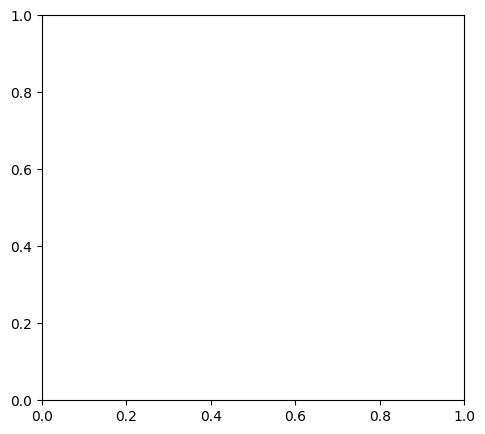

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Precision (Training)')
plt.plot(val_acc, label='Precision (Validation)')
plt.legend()
plt.title('Loss Curve Precision')
plt.xlabel('Époque')

plt.tight_layout()
plt.show()

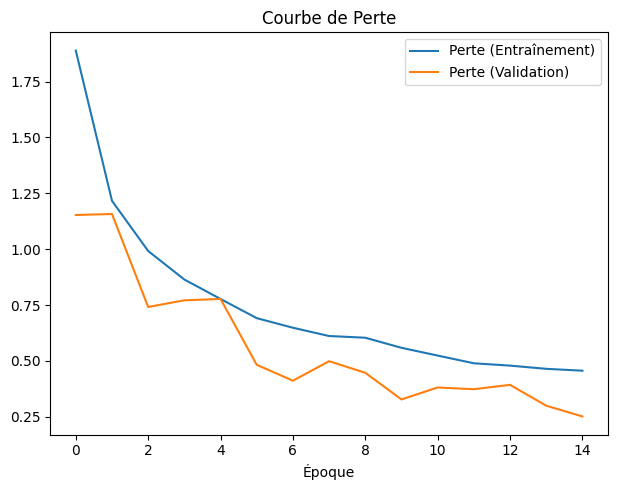

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (Training)')
plt.plot(val_loss, label='Loss (Validation)')
plt.legend()
plt.title('Loss Curve Visualization')
plt.xlabel('Époch')

plt.tight_layout()
plt.show()

In [ ]:
### Bloc 8 : Saving the Trained Model

print("\n--- Saving the model ---")

#Recommended Filename with .keras Extension
nom_fichier_modele = 'plant_disease_model.keras'

# Model Saving in Native .keras Format
model.save(nom_fichier_modele)

print(f"--> Model successfully saved to file : {nom_fichier_modele}")